# **Titanic Survival Prediction**

# Preface

 The Titanic disaster of 1912 remains one of the most infamous maritime tragedies in history. This project aims to build a machine learning model that can predict whether a passenger would have survived or not, based on features like age, gender, class, and fare.

We use the Titanic dataset from Kaggle, which includes demographic and travel details of passengers. The goal is to understand key factors affecting survival and apply various classification algorithms to solve this binary classification problem.
This project aims to develop a machine learning model that can predict whether a passenger would survive the Titanic disaster based on their personal and travel attributes.

 # Dataset overview

 | Column        | Description                                                          |
| ------------- | -------------------------------------------------------------------- |
| `PassengerId` | Unique ID for each passenger                                         |
| `Survived`    | Survival (0 = No, 1 = Yes)                                           |
| `Pclass`      | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                             |
| `Name`        | Name of passenger                                                    |
| `Sex`         | Gender of passenger                                                  |
| `Age`         | Age in years (missing for some)                                      |
| `SibSp`       | # of siblings/spouses aboard                                         |
| `Parch`       | # of parents/children aboard                                         |
| `Ticket`      | Ticket number (alphanumeric)                                         |
| `Fare`        | Ticket fare                                                          |
| `Cabin`       | Cabin number (many missing)                                          |
| `Embarked`    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |


#objective:
To build a binary classification model that takes the passenger's details as input and predicts the likelihood of survival (Survived = 0 or 1).

## 1. Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Please update the file path if it's different
file_path = '/content/drive/MyDrive/titanic.csv'

try:
    df = pd.read_csv(file_path)
    display(df.head())
except FileNotFoundError:
    print(f"File not found at: {file_path}")
    print("Please update the file_path variable with the correct path to your file.")

File not found at: /content/drive/MyDrive/titanic.csv
Please update the file_path variable with the correct path to your file.


In [ ]:
import zipfile
import pandas as pd

zip_file_path = '/content/drive/My Drive/ titanic/titanic.zip'
extract_path = '/content/titanic_data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Assuming the csv file inside the zip is named 'titanic.csv'
csv_file_path = f'{extract_path}/Titanic-Dataset.csv'

try:
    df = pd.read_csv(csv_file_path)
    display(df.head())
except FileNotFoundError:
    print(f"Could not find 'Titanic-Dataset.csv' in the unzipped folder.")
    print("Please check the contents of the zip file.")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import zipfile

zip_file_path = '/content/drive/My Drive/ titanic/titanic.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    print(zip_ref.namelist())

['Titanic-Dataset.csv']


## 2. Explore the Data

In [ ]:
# Get a summary of the DataFrame, including the number of non-null values in each column
df.info()

# Get descriptive statistics for the numerical columns
display(df.describe())

# Check for the number of missing values in each column
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


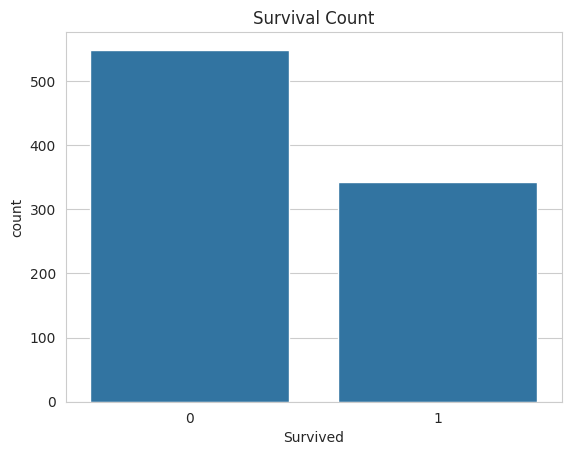

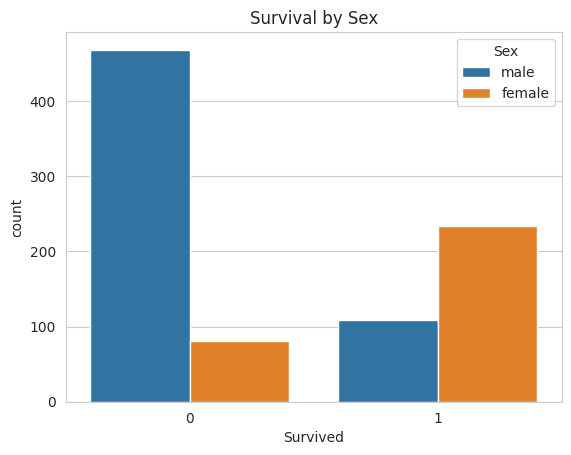

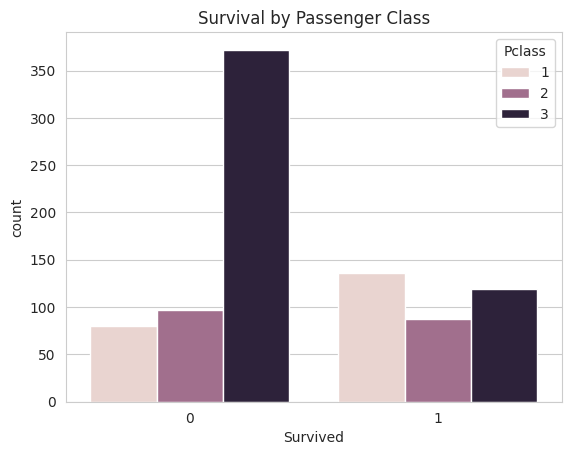

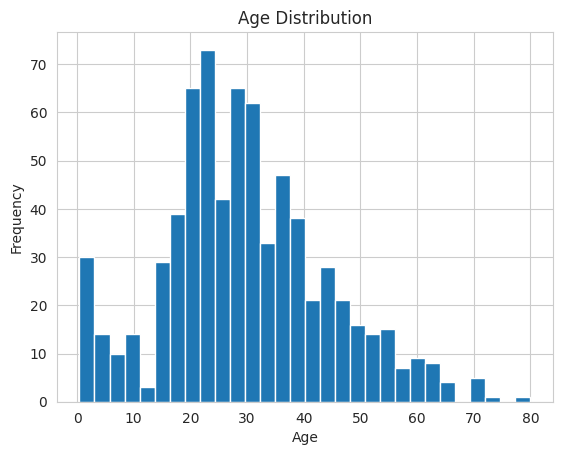

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Set the style of the visualization
sns.set_style('whitegrid')

# Create a bar plot to show the number of survivors and non-survivors
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Create a bar plot to show the survival rate by sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

# Create a bar plot to show the survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Create a histogram of the age distribution
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 3. Preprocess the Data

In [ ]:
# Fill missing 'Age' values with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' values with the most frequent value (the mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify that there are no more missing values
display(df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

display(df.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


## 4. Train the Model(LOGISTIC REGRESSION)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
# We'll drop 'Name', 'Ticket', and 'Cabin' as they are not useful for prediction
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


## 5. Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a more detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



## 6. Hyperparameter Tuning(LOGISTIC REGRESSION)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Calculate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.2f}")

# Display a more detailed classification report
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8019107652910471

Tuned Model Accuracy: 0.80

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")

# Display a detailed classification report for the Random Forest model
print("\nRandom Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.82

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Hyperparameter Tuning(RANDOM FOREST)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_model_rf = grid_search_rf.best_estimator_
y_pred_tuned_rf = best_model_rf.predict(X_test)

# Calculate the accuracy of the tuned model
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(f"\nTuned Random Forest Model Accuracy: {accuracy_tuned_rf:.2f}")

# Display a more detailed classification report
print("\nTuned Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_tuned_rf))

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score for Random Forest: 0.828592534226337

Tuned Random Forest Model Accuracy: 0.82

Tuned Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## 8. **Model Comparison and Conclusion**

In this project, we built and evaluated two different machine learning models to predict passenger survival on the Titanic: a Logistic Regression model and a Random Forest model. We also performed hyperparameter tuning on both models to optimize their performance.

## **Model Performance Comparison**

| Model | Accuracy | Precision (Survived) | Recall (Survived) |
|---|---|---|---|
| Logistic Regression | 0.80 | 0.77 | 0.74 |
| Tuned Logistic Regression | 0.80 | 0.78 | 0.72 |
| Random Forest | 0.82 | 0.81 | 0.74 |
| Tuned Random Forest | 0.82 | 0.81 | 0.74 |





## **Challenges Faced**

*   **Missing Data**: One of the main challenges in this project was dealing with missing data. The "Age" and "Cabin" columns had a significant number of missing values, which had to be handled before training the models. We chose to fill the missing "Age" values with the median age of all passengers, and we dropped the "Cabin" column altogether since it had too many missing values to be useful.

*   **Feature Engineering**: Another challenge was feature engineering. We had to convert the categorical "Sex" and "Embarked" columns into a numerical format that could be used by our machine learning models. We also had to decide which features to include in our models and which to exclude. We chose to drop the "Name" and "Ticket" columns as they were not likely to be useful for prediction.

## **Conclusion**

As we can see from the table above, the **Random Forest model performed slightly better** than the Logistic Regression model in terms of overall accuracy and precision in predicting survivors. Hyperparameter tuning did not lead to a significant improvement in the performance of either model in this case.

The Random Forest model, being an ensemble of decision trees, is generally more powerful and can capture more complex relationships in the data. This is likely why it outperformed the simpler Logistic Regression model.

This project successfully demonstrates a complete machine learning workflow, from data loading and preprocessing to model training, evaluation, and hyperparameter tuning. We have shown that by using machine learning, we can predict with a reasonable degree of accuracy whether a passenger on the Titanic would have survived.